# MI 1 (2021): Exercise sheet 4

### Exercise H4.2: Comparison of gradient descent methods

In this exercise we compare the performance of three learning procedures applied to a simple
connectionist neuron with a linear output function. The three methods are
* Gradient (or steepest) descent.
* Line Search.
* Conjugate gradient descent.

In [189]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# fictitious dataset with only 3 examples
x = np.array([-1,0.3,2])
y = np.array([-0.1,0.5,0.5]).reshape(1,3)

X = np.stack((np.array([1,1,1]), x), axis = 1).T # design matrix
H = np.dot(X,X.T) # hessian
g = lambda w: np.dot(H,w) - np.dot(X, y.T) # gradient as a function of the weigths
w1 = np.array([-0.45,0.2]).reshape(2,1) # initialize weigths

##### Gradient descent

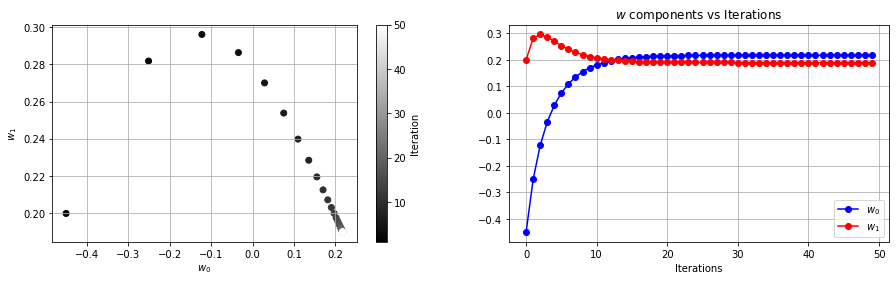

In [167]:
# Training
eta = 0.1
epochs = 50
w_gd = np.zeros((epochs,2,1))
w_gd[0] = w1
for i in range(epochs-1):
    w_gd[i+1] = w_gd[i] - eta*g(w_gd[i])

# Plot
w_gd0 = w_gd[:,0]
w_gd1 = w_gd[:,1]

fig, (ax0,ax1) = plt.subplots(1,2, figsize = (15,4))

colors = np.linspace(1,len(w_gd),len(w_gd))
scatter_plot = ax0.scatter(w_gd0, w_gd1, c = colors, cmap="gray")
ax0.set_xlabel("$w_0$")
ax0.set_ylabel("$w_1$")
ax0.grid()
fig.colorbar(scatter_plot, ax = ax0, label = "Iteration")

ax1.plot(w_gd0, 'bo-', label = "$w_0$")
ax1.plot(w_gd1, 'ro-', label = "$w_1$")
ax1.set_title("$w$ components vs Iterations")
ax1.set_xlabel("Iterations")
ax1.grid()

plt.legend()
plt.show()

##### Line search

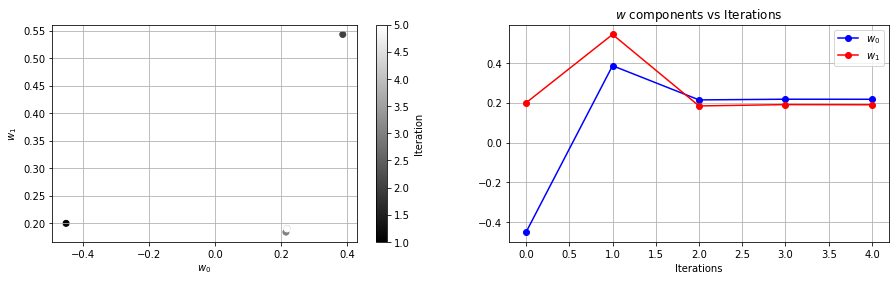

In [196]:
# Training
epochs = 5
w_ls = np.zeros((epochs,2,1))
w_ls[0] = w1
for i in range(epochs-1):
    eta = np.dot(w_ls[i].T,w_ls[i])/(w_ls[i].T.dot(H).dot(w_ls[i]))
    w_ls[i+1] = w_ls[i] - eta*g(w_ls[i])

# Plot
w_ls0 = w_ls[:,0]
w_ls1 = w_ls[:,1]

fig, (ax0,ax1) = plt.subplots(1,2, figsize = (15,4))

colors = np.linspace(1,len(w_ls),len(w_ls))
scatter_plot = ax0.scatter(w_ls0, w_ls1, c = colors, cmap="gray")
ax0.set_xlabel("$w_0$")
ax0.set_ylabel("$w_1$")
ax0.grid()
fig.colorbar(scatter_plot, ax = ax0, label = "Iteration")

ax1.plot(w_ls0, 'bo-', label = "$w_0$")
ax1.plot(w_ls1, 'ro-', label = "$w_1$")
ax1.set_title("$w$ components vs Iterations")
ax1.set_xlabel("Iterations")
ax1.grid()

plt.legend()
plt.show()

##### Conjugate gradient descent

It converges in just 2 iterations!

/home/guybrush/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


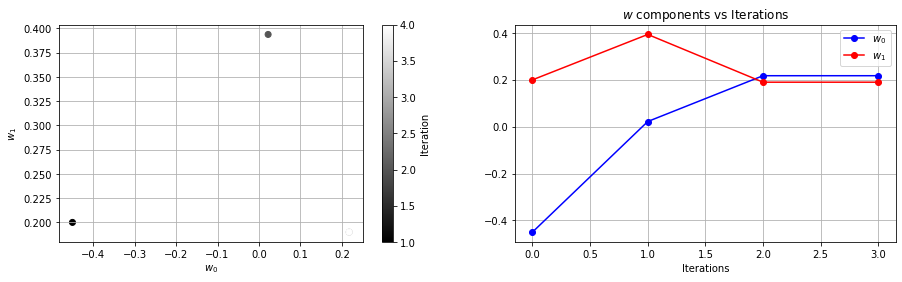

In [197]:
# Training
epochs = 5
w_cg = np.zeros((epochs,2,1))
w_cg[0] = w1
d = -g(w1)

for i in range(epochs-1):
    eta = - np.dot(d.T,g(w_cg[i]))/(d.T.dot(H).dot(d)) # eta_t
    w_cg[i+1] = w_cg[i] + eta*d
    # calculate new d
    beta = - np.dot(g(w_cg[i+1]).T, g(w_cg[i+1]))/(np.dot(g(w_cg[i]).T, g(w_cg[i])))# momentum
    d = g(w_cg[i+1]) + beta*d
    
# Plot
w_cg0 = w_cg[:,0]
w_cg1 = w_cg[:,1]

fig, (ax0,ax1) = plt.subplots(1,2, figsize = (15,4))

colors = np.linspace(1,len(w_cg),len(w_cg))
scatter_plot = ax0.scatter(w_cg0, w_cg1, c = colors, cmap="gray")
ax0.set_xlabel("$w_0$")
ax0.set_ylabel("$w_1$")
ax0.grid()
fig.colorbar(scatter_plot, ax = ax0, label = "Iteration")

ax1.plot(w_cg0, 'bo-', label = "$w_0$")
ax1.plot(w_cg1, 'ro-', label = "$w_1$")
ax1.set_title("$w$ components vs Iterations")
ax1.set_xlabel("Iterations")
ax1.grid()

plt.legend()
plt.show()